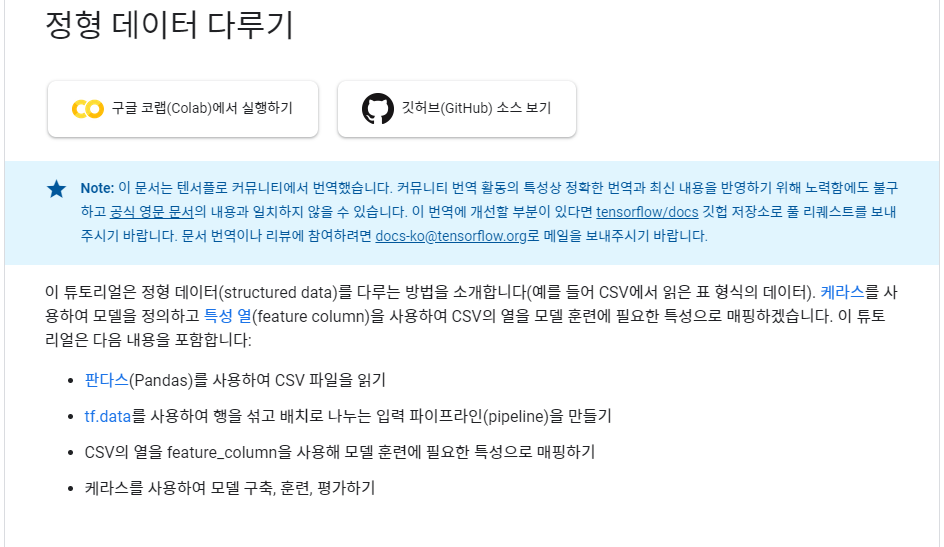

In [3]:
import pandas as pd

In [2]:
import tensorflow as tf

In [9]:
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split

In [6]:
URL = 'https://storage.googleapis.com/applied-dl/heart.csv'
dataframe = pd.read_csv(URL)

In [8]:
dataframe.info() #thal        303 non-null object 바꿀전략

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 33.2+ KB


In [12]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
# hold-out기법
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')

193 훈련 샘플
49 검증 샘플
61 테스트 샘플


In [13]:
# 판다스 데이터프레임으로부터 tf.data 데이터셋을 만들기 위한 함수
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [14]:
batch_size = 5 # 예제를 위해 작은 배치 크기를 사용합니다.
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [19]:
for feature_batch, label_batch in train_ds.take(1):
    print('전체 특성:', list(feature_batch.keys()))
    print('나이 특성의 배치:', feature_batch['age'])
    print('타깃의 배치:', label_batch )

전체 특성: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
나이 특성의 배치: tf.Tensor([45 64 49 49 49], shape=(5,), dtype=int32)
타깃의 배치: tf.Tensor([0 0 1 0 0], shape=(5,), dtype=int32)


In [20]:
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


In [21]:
dataframe.values #age난 요런 정보가 사라진다. 나중에 바꿀때 체크를 해야한다.

array([[63, 1, 1, ..., 0, 'fixed', 0],
       [67, 1, 4, ..., 3, 'normal', 1],
       [67, 1, 4, ..., 2, 'reversible', 0],
       ...,
       [65, 1, 4, ..., 1, 'reversible', 1],
       [48, 1, 4, ..., 2, 'reversible', 1],
       [63, 0, 4, ..., 3, 'reversible', 1]], dtype=object)

In [16]:
dict(dataframe)

{'age': 0      63
 1      67
 2      67
 3      37
 4      41
 5      56
 6      62
 7      57
 8      63
 9      53
 10     57
 11     56
 12     56
 13     44
 14     52
 15     57
 16     48
 17     54
 18     48
 19     49
 20     64
 21     58
 22     58
 23     58
 24     60
 25     50
 26     58
 27     66
 28     43
 29     40
        ..
 273    46
 274    58
 275    54
 276    54
 277    60
 278    60
 279    54
 280    59
 281    46
 282    59
 283    60
 284    52
 285    48
 286    45
 287    34
 288    57
 289    71
 290    49
 291    54
 292    59
 293    57
 294    61
 295    39
 296    61
 297    56
 298    52
 299    43
 300    65
 301    48
 302    63
 Name: age, Length: 303, dtype: int64, 'sex': 0      1
 1      1
 2      1
 3      1
 4      0
 5      1
 6      0
 7      0
 8      1
 9      1
 10     1
 11     0
 12     1
 13     1
 14     1
 15     1
 16     1
 17     1
 18     0
 19     1
 20     1
 21     0
 22     1
 23     1
 24     1
 25     0
 26     0
 27    

---

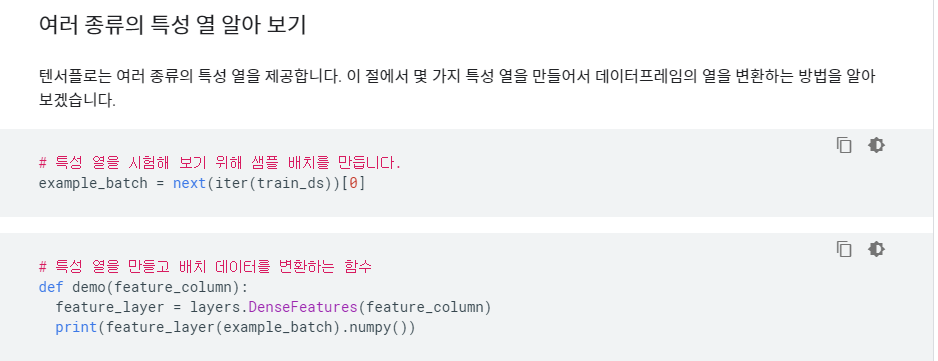

---

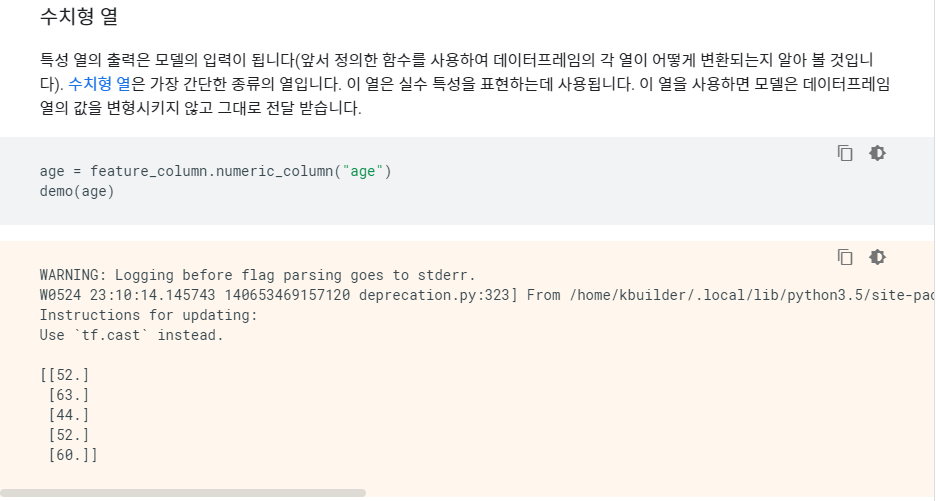

---

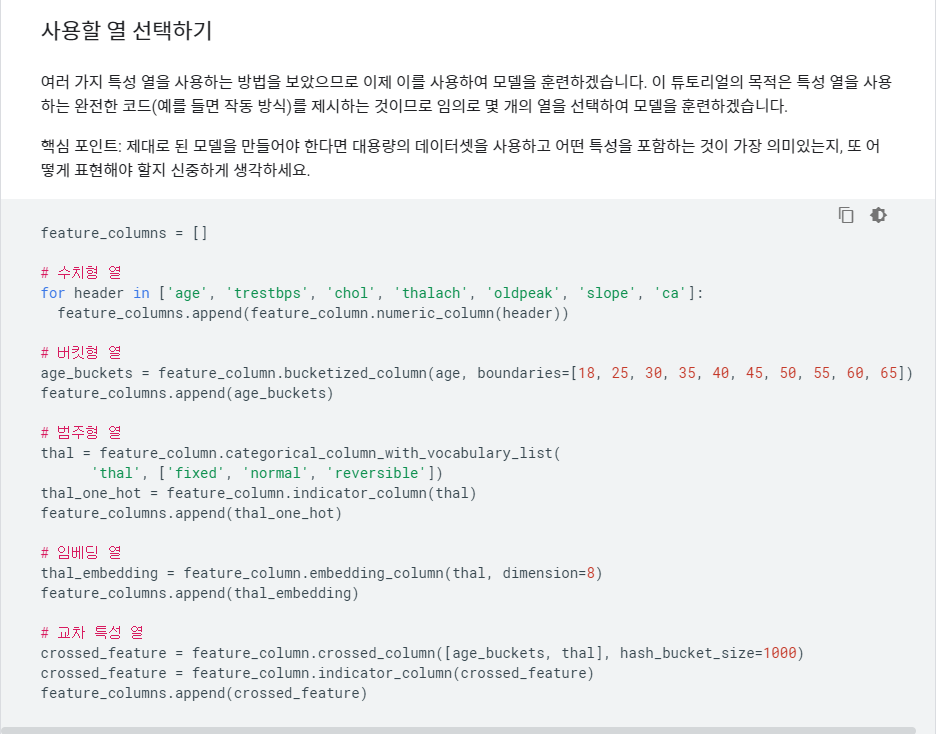

---

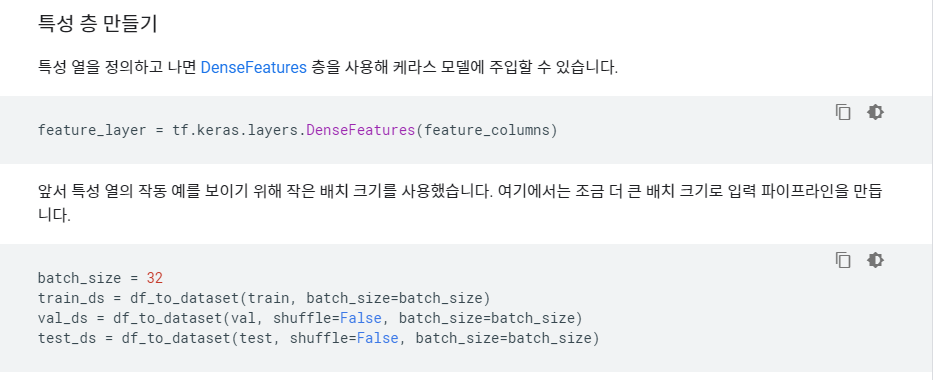

---

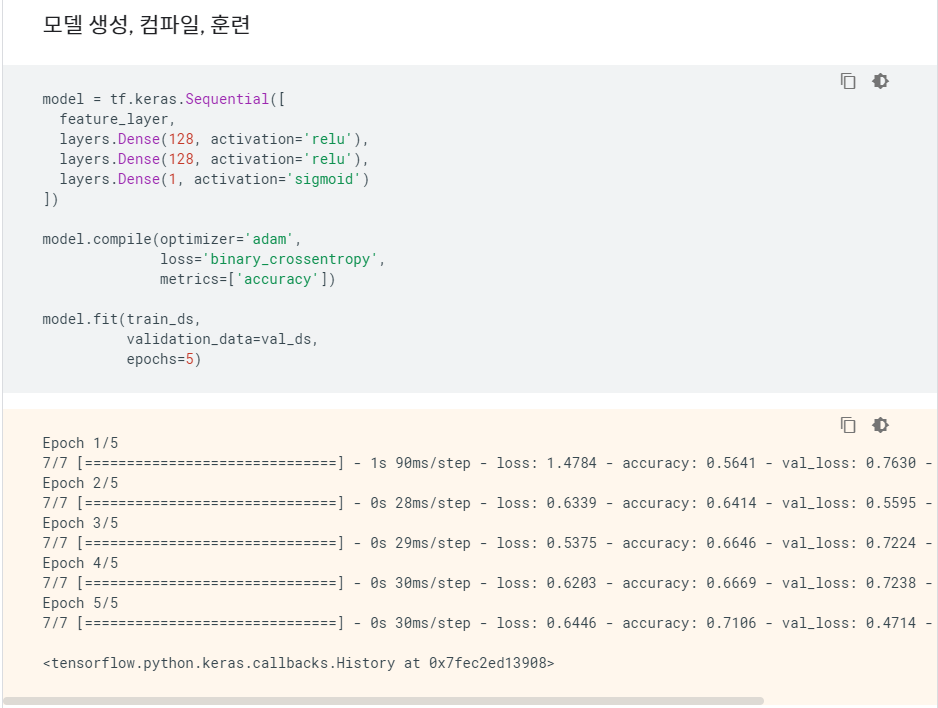

파이프라인 = pandas -> tensorflow연결시켜준다.

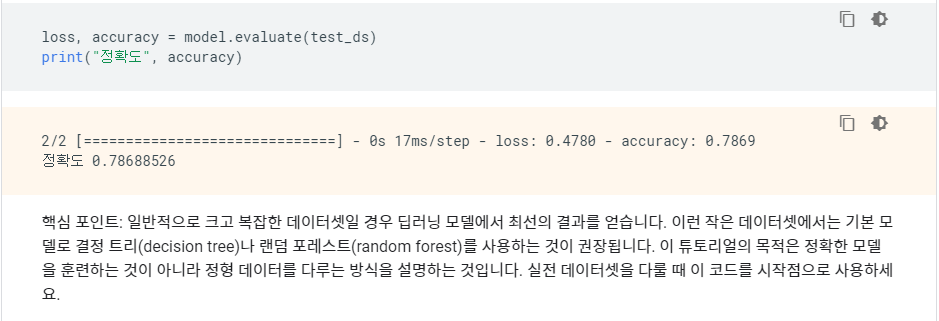